**1. Chi_square test**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Data provided
data = {'Satisfaction': ['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied'],
        'Smart Thermostat': [50, 80, 60, 30, 20],
        'Smart Light': [70, 100, 90, 50, 50]}

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Satisfaction', inplace=True)

In [4]:
# Display the DataFrame
print(df)

                  Smart Thermostat  Smart Light
Satisfaction                                   
Very Satisfied                  50           70
Satisfied                       80          100
Neutral                         60           90
Unsatisfied                     30           50
Very Unsatisfied                20           50


In [6]:
# State the hypotheses
# H0: There is no association between the type of device and customer satisfaction.
# H1: There is an association between the type of device and customer satisfaction.

In [5]:
# Compute the Chi-Square statistic
chi2, p, dof, expected = stats.chi2_contingency(df)

In [7]:
# Determine the critical value
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, dof)

In [8]:
# Make a decision
if chi2 > critical_value:
    decision = "Reject the null hypothesis. There is a significant association between the type of device and customer satisfaction."
else:
    decision = "Fail to reject the null hypothesis. There is no significant association between the type of device and customer satisfaction."


In [9]:
# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"Critical Value: {critical_value}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")
print(f"Decision: {decision}")

Chi-Square Statistic: 5.638227513227513
Critical Value: 9.487729036781154
P-Value: 0.22784371130697179
Degrees of Freedom: 4
Expected Frequencies: 
[[ 48.  72.]
 [ 72. 108.]
 [ 60.  90.]
 [ 32.  48.]
 [ 28.  42.]]
Decision: Fail to reject the null hypothesis. There is no significant association between the type of device and customer satisfaction.


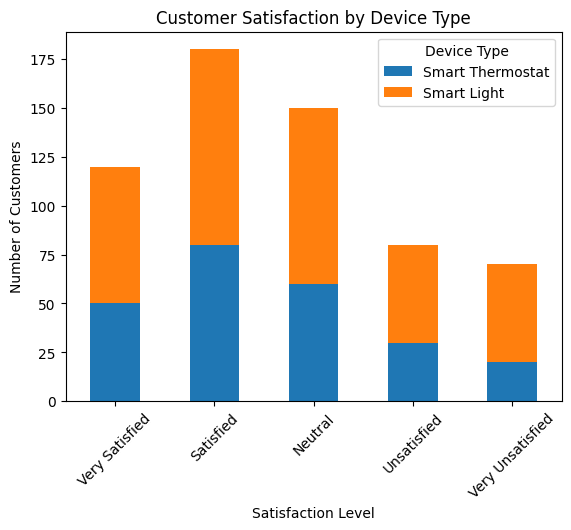

In [10]:
# Visualization of the data
df.plot(kind='bar', stacked=True)
plt.title('Customer Satisfaction by Device Type')
plt.ylabel('Number of Customers')
plt.xlabel('Satisfaction Level')
plt.xticks(rotation=45)
plt.legend(title='Device Type')
plt.show()

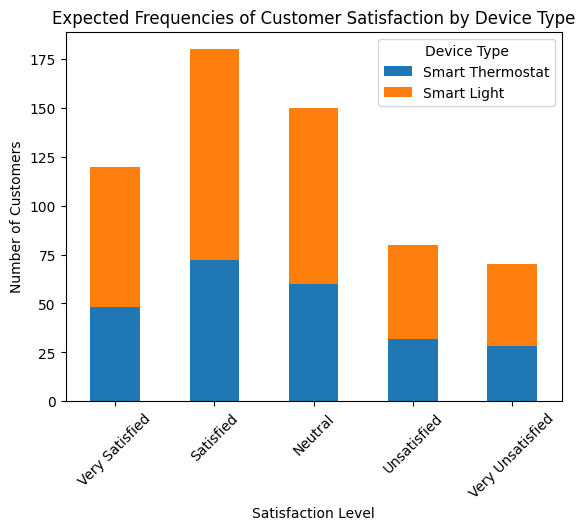

In [11]:
# Visualization of the expected frequencies
expected_df = pd.DataFrame(expected, index=df.index, columns=df.columns)
expected_df.plot(kind='bar', stacked=True)
plt.title('Expected Frequencies of Customer Satisfaction by Device Type')
plt.ylabel('Number of Customers')
plt.xlabel('Satisfaction Level')
plt.xticks(rotation=45)
plt.legend(title='Device Type')
plt.show()

**2. Hypothesis Testing for Operating Costs**

In [12]:
import numpy as np
import scipy.stats as stats

In [13]:
# Data provided
sample_mean = 3050
theoretical_mean = 1000 + 5 * 600
std_dev = 5 * 25
sample_size = 25
alpha = 0.05

In [ ]:
# State the hypotheses
# H0: The true mean weekly cost is equal to the theoretical mean weekly cost.
# H1: The true mean weekly cost is greater than the theoretical mean weekly cost.

In [14]:
# Calculate the test statistic
t_statistic = (sample_mean - theoretical_mean) / (std_dev / np.sqrt(sample_size))

In [15]:
# Determine the critical value from the standard normal (Z) distribution table
critical_value = stats.norm.ppf(1 - alpha)

In [16]:
# Make a decision
if t_statistic > critical_value:
    decision = "Reject the null hypothesis. There is strong evidence to support the claim that the weekly operating costs are higher than the model suggests."
else:
    decision = "Fail to reject the null hypothesis. There is not enough evidence to support the claim that the weekly operating costs are higher than the model suggests."

In [17]:
# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Sample Size: {sample_size}")
print(f"Alpha: {alpha}")
print(f"T-Statistic: {t_statistic}")
print(f"Critical Value: {critical_value}")
print(f"Decision: {decision}")

Sample Mean: 3050
Theoretical Mean: 4000
Standard Deviation: 125
Sample Size: 25
Alpha: 0.05
T-Statistic: -38.0
Critical Value: 1.6448536269514722
Decision: Fail to reject the null hypothesis. There is not enough evidence to support the claim that the weekly operating costs are higher than the model suggests.


In [18]:
# Confidence interval for the mean
confidence_interval = stats.norm.interval(1 - alpha, loc=sample_mean, scale=std_dev / np.sqrt(sample_size))
print(f"95% Confidence Interval for the Mean: {confidence_interval}")

95% Confidence Interval for the Mean: (3001.000900386499, 3098.999099613501)


In [19]:
# Visualization
x = np.linspace(theoretical_mean - 4*std_dev, theoretical_mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, theoretical_mean, std_dev / np.sqrt(sample_size))

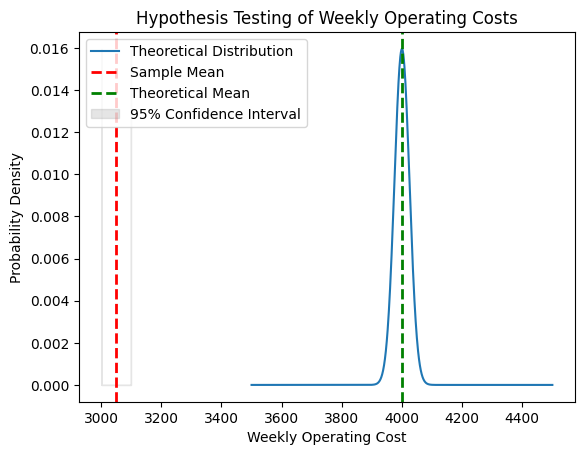

In [20]:
plt.plot(x, y, label='Theoretical Distribution')
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(theoretical_mean, color='g', linestyle='dashed', linewidth=2, label='Theoretical Mean')
plt.fill_betweenx(y, confidence_interval[0], confidence_interval[1], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Hypothesis Testing of Weekly Operating Costs')
plt.xlabel('Weekly Operating Cost')
plt.ylabel('Probability Density')
plt.legend()
plt.show()